http://www.statsmodels.org/stable/anova.html

方差分析(Analysis of Variance，简称ANOVA)，又称“变异数分析”，为数据分析中常见的统计模型，主要为探讨连续型（Continuous）因变量（Dependent variable）与类别型自变量（Independent variable）的关系。当自变量的因子等于或超过三个类别时，检验各类别平均值是否相等，采用方差分析。
广义t检验中，方差相等（Equality of variance）的合并t检验（Pooled T-test）视为是方差分析的一种。t检验分析两组平均数是否相等，方差分析也采用相同的计算概念，实际上，当方差分析套用在合并t检验的分析上时，产生的F值则会等于t检验的平方项。

总偏差平方和 SSt=SSb+SSw

statsmodels包含anova_lm模型，用于使用线性OLSModel进行方差分析，和AnovaRM模型，用于重复测量方差分析（包含平衡数据方差分析）。

**Examples**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from urllib import request
from urllib.error import URLError
from time import sleep
keep_request = True
while keep_request:
    try:
        moore = sm.datasets.get_rdataset("Moore", "car",
                                 cache=True) # load data
        data = moore.data
        data = data.rename(columns={"partner.status":
                            "partner_status"}) # make name pythonic

        moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                data=data).fit()

        table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
        print(table)
        keep_request = False
    except URLError:
        sleep(10000)

In [8]:
?sm.datasets.get_rdataset

Object `sm.datasets.get_rdataset` not found.


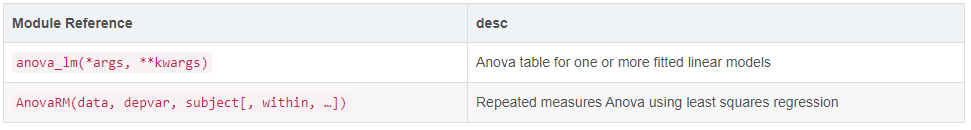